#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 02
**CH02B Identifying successful football managers**

using the football dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/football/clean/"
data_out = dirname + "da_case_studies/ch02-football-manager-success/"
output = dirname + "da_case_studies/ch02-football-manager-success/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
epl_games = pd.read_csv(data_in + "epl_games.csv")

In [5]:
epl_games.sort_values(["team_home"])

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
0,E0,2008,16aug2008,Arsenal,West Brom,3,0,1,0
3638,E0,2017,03jan2018,Arsenal,Chelsea,1,1,2,2
1900,E0,2013,17aug2013,Arsenal,Aston Villa,0,3,1,3
1014,E0,2010,12feb2011,Arsenal,Wolves,3,0,2,0
3939,E0,2018,02dec2018,Arsenal,Tottenham,3,0,4,2
...,...,...,...,...,...,...,...,...,...
1004,E0,2010,05feb2011,Wolves,Man United,3,0,2,1
489,E0,2009,07nov2009,Wolves,Arsenal,0,3,1,4
3928,E0,2018,25nov2018,Wolves,Huddersfield,0,3,0,2
553,E0,2009,20dec2009,Wolves,Burnley,3,0,2,0


In [6]:
epl_games.sort_values(["season", "team_home"])

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
0,E0,2008,16aug2008,Arsenal,West Brom,3,0,1,0
21,E0,2008,30aug2008,Arsenal,Newcastle,3,0,3,0
53,E0,2008,27sep2008,Arsenal,Hull,0,3,1,2
75,E0,2008,18oct2008,Arsenal,Everton,3,0,3,1
95,E0,2008,29oct2008,Arsenal,Tottenham,1,1,4,4
...,...,...,...,...,...,...,...,...,...
4085,E0,2018,02mar2019,Wolves,Cardiff,3,0,2,0
4115,E0,2018,02apr2019,Wolves,Man United,3,0,2,1
4139,E0,2018,20apr2019,Wolves,Brighton,1,1,0,0
4148,E0,2018,24apr2019,Wolves,Arsenal,3,0,3,1


In [7]:
epl_games.query("season==2016")

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
3040,E0,2016,13aug2016,Middlesbrough,Stoke,1,1,1,1
3041,E0,2016,13aug2016,Burnley,Swansea,0,3,0,1
3042,E0,2016,13aug2016,Everton,Tottenham,1,1,1,1
3043,E0,2016,13aug2016,Crystal Palace,West Brom,0,3,0,1
3044,E0,2016,13aug2016,Man City,Sunderland,3,0,2,1
...,...,...,...,...,...,...,...,...,...
3415,E0,2016,21may2017,Swansea,West Brom,3,0,2,1
3416,E0,2016,21may2017,Chelsea,Sunderland,3,0,5,1
3417,E0,2016,21may2017,Arsenal,Everton,3,0,3,1
3418,E0,2016,21may2017,Watford,Man City,0,3,0,5


In [8]:
# look at data for team-game level
# TODO: change to csv when we have it
epl_teams_games = pd.read_csv(data_in + "epl-teams-games.csv")

In [9]:
epl_teams_games.sort_values(["team"])

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid
0,E0,2008,16aug2008,Arsenal,1,1,3,1,West Brom,0,0,1,33
286,E0,2015,13jan2016,Arsenal,21,0,1,3,Liverpool,1,3,18,1
285,E0,2015,02jan2016,Arsenal,20,1,3,1,Newcastle,0,0,1,22
283,E0,2015,26dec2015,Arsenal,18,0,0,0,Southampton,3,4,27,1
282,E0,2015,21dec2015,Arsenal,17,1,3,2,Man City,0,1,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8259,E0,2010,20nov2010,Wolves,14,0,0,1,Blackpool,3,2,5,36
8260,E0,2010,27nov2010,Wolves,15,1,3,3,Sunderland,0,2,36,29
8261,E0,2010,04dec2010,Wolves,16,0,0,0,Blackburn,3,3,4,36
8254,E0,2010,23oct2010,Wolves,9,0,0,0,Chelsea,3,2,11,36


In [10]:
epl_teams_games.sort_values(["season", "team"])

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid
0,E0,2008,16aug2008,Arsenal,1,1,3,1,West Brom,0,0,1,33
1,E0,2008,23aug2008,Arsenal,2,0,0,0,Fulham,3,1,14,1
2,E0,2008,30aug2008,Arsenal,3,1,3,3,Newcastle,0,0,1,22
3,E0,2008,13sep2008,Arsenal,4,0,3,4,Blackburn,0,0,4,1
4,E0,2008,20sep2008,Arsenal,5,0,3,3,Bolton,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,E0,2018,20apr2019,Wolves,34,1,1,0,Brighton,1,0,36,8
8356,E0,2018,24apr2019,Wolves,35,1,3,3,Arsenal,0,1,36,1
8357,E0,2018,27apr2019,Wolves,36,0,3,2,Watford,0,1,32,36
8358,E0,2018,04may2019,Wolves,37,1,3,1,Fulham,0,0,36,14


In [11]:
epl_teams_games.query("season==2016")

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid
304,E0,2016,14aug2016,Arsenal,1,1,0,3,Liverpool,3,4,1,18
305,E0,2016,20aug2016,Arsenal,2,0,1,0,Leicester,1,0,17,1
306,E0,2016,27aug2016,Arsenal,3,0,3,3,Watford,0,1,32,1
307,E0,2016,10sep2016,Arsenal,4,1,3,2,Southampton,0,1,1,27
308,E0,2016,17sep2016,Arsenal,5,0,3,4,Hull,0,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,E0,2016,22apr2017,West Ham,34,1,1,0,Everton,1,0,34,13
7938,E0,2016,29apr2017,West Ham,35,0,1,0,Stoke,1,0,28,34
7939,E0,2016,05may2017,West Ham,36,1,3,1,Tottenham,0,0,34,31
7940,E0,2016,14may2017,West Ham,37,1,0,0,Liverpool,3,4,34,18


In [12]:
football_managers = pd.read_csv(data_in + "football_managers.csv")
football_managers

,manager_id,manager_name,club,caretaker,date_from,date_until,nat,league,flag_inoffice
0,George Graham,George Graham,Arsenal,0,14may1986,21feb1995,Scotland,EPL,0
1,Stewart Houston,Stewart Houston,Arsenal,1,22feb1995,08jun1995,Scotland,EPL,0
2,Bruce Rioch,Bruce Rioch,Arsenal,0,08jun1995,12aug1996,Scotland,EPL,0
3,Stewart Houston,Stewart Houston,Arsenal,1,12aug1996,13sep1996,Scotland,EPL,0
4,Pat Rice,Pat Rice,Arsenal,1,13sep1996,30sep1996,Northern Ireland,EPL,0
...,...,...,...,...,...,...,...,...,...
390,Terry Burton,Terry Burton,Wimbledon,0,01may2000,25apr2002,England,EPL,0
391,Dave Jones,Dave Jones,Wolverhampton Wanderers,0,03jan2001,11nov2004,England,EPL,0
392,Mick McCarthy,Mick McCarthy,Wolverhampton Wanderers,0,05aug2006,14feb2012,Republic of Ireland,EPL,0
393,Terry Connor,Terry Connor,Wolverhampton Wanderers,0,24feb2012,30jun2012,England,EPL,0


In [13]:
# finally the merged file

football_managers_merged = pd.read_csv(
    data_in + "football_managers_workfile.csv"
).sort_values(["season", "team"])

In [14]:
games = football_managers_merged.groupby(["team", "manager_id", "manager_name"]).agg(
    manager_games=("div", "size")
)
points = football_managers_merged.groupby(["team", "manager_id", "manager_name"]).agg(
    manager_points=("points", "sum")
)

In [15]:
# default join is by indices which is multiindex group key this time
win_ratio = games.join(points)
win_ratio["manager_win_ratio"] = (
    win_ratio["manager_points"] / win_ratio["manager_games"]
)
win_ratio = win_ratio.sort_values("manager_win_ratio")

In [16]:
win_ratio = win_ratio.sort_values(["manager_win_ratio"], ascending=False)

In [17]:
top_managers = win_ratio.query("manager_win_ratio >= 2")
top_managers

manager_games  manager_points  \
team        manager_id manager_name                                       
Leicester   150        Michael Appleton               1               3   
Man City    175        Pep Guardiola                114             276   
Man United  12         Alex Ferguson                190             433   
Chelsea     17         Antonio Conte                 76             163   
            37         Carlo Ancelotti               76             157   
Man City    193        Roberto Mancini              134             276   
Liverpool   122        Jürgen Klopp                 144             296   
Man City    139        Manuel Pellegrini            114             231   
West Ham    6          Alan Curbishley                3               6   
Chelsea     120        José Mourinho                 92             184   
Aston Villa 131        Kevin MacDonald                3               6   

                                          manager_win_ratio  
team        manager_id manager_name                          
Leicester   150        Michael Appleton            3.000000  
Man City    175        Pep Guardiola               2.421053  
Man United  12         Alex Ferguson               2.278947  
Chelsea     17         Antonio Conte               2.144737  
            37         Carlo Ancelotti             2.065789  
Man City    193        Roberto Mancini             2.059701  
Liverpool   122        Jürgen Klopp                2.055556  
Man City    139        Manuel Pellegrini           2.026316  
West Ham    6          Alan Curbishley             2.000000  
Chelsea     120        José Mourinho               2.000000  
Aston Villa 131        Kevin MacDonald             2.000000

In [18]:
# denote caretakers
top_managers["manager_win_ratio0"] = [
    row["manager_win_ratio"] if row["manager_games"] < 18 else pd.np.nan
    for index, row in top_managers.iterrows()
]
top_managers["manager_win_ratio1"] = [
    row["manager_win_ratio"] if row["manager_games"] > 18 else pd.np.nan
    for index, row in top_managers.iterrows()
]

In [19]:
# visualize

# denote caretakers
top_managers["fill"] = [
    "1" if row["manager_games"] < 18 else 0 for index, row in top_managers.iterrows()
]

In [20]:
top_managers=top_managers.reset_index()
top_managers

,team,manager_id,manager_name,manager_games,manager_points,manager_win_ratio,manager_win_ratio0,manager_win_ratio1,fill
0,Leicester,150,Michael Appleton,1,3,3.000000,3.0,NaN,1
1,Man City,175,Pep Guardiola,114,276,2.421053,NaN,2.421053,0
2,Man United,12,Alex Ferguson,190,433,2.278947,NaN,2.278947,0
3,Chelsea,17,Antonio Conte,76,163,2.144737,NaN,2.144737,0
4,Chelsea,37,Carlo Ancelotti,76,157,2.065789,NaN,2.065789,0
5,Man City,193,Roberto Mancini,134,276,2.059701,NaN,2.059701,0
6,Liverpool,122,Jürgen Klopp,144,296,2.055556,NaN,2.055556,0
7,Man City,139,Manuel Pellegrini,114,231,2.026316,NaN,2.026316,0
8,West Ham,6,Alan Curbishley,3,6,2.000000,2.0,NaN,1
9,Chelsea,120,José Mourinho,92,184,2.000000,NaN,2.000000,0


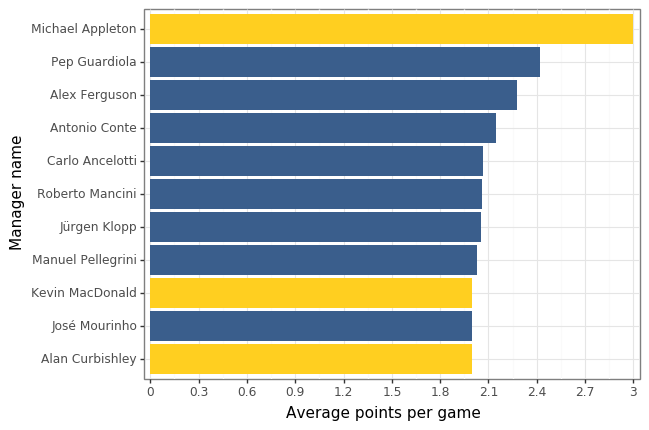

<ggplot: (8765781284000)>

In [21]:
top_managers=top_managers.sort_values(["manager_win_ratio"])
ggplot(
    top_managers,
    aes(x="reorder(manager_name,manager_win_ratio)", y="manager_win_ratio",fill=[color[3] if x=="1" else color[0] for x in top_managers.fill]),
) + geom_col(show_legend=False) + ylab("Average points per game") + xlab(
    "Manager name"
) + scale_fill_manual(
    values=(color[0], color[3])
) + scale_alpha_manual(
    values=(0.8, 0.3)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 3), breaks=seq(0, 3.1, 0.3)
) + coord_flip() + theme_bw()